<a href="https://colab.research.google.com/github/sirius70/NLP_HW3/blob/main/IE7275_Module6_Part1_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IE7275 Data Mining in Engineering**
### -- STUDENT VERSION --

---
#### **Guidelines for Completing and Submitting This Notebook**

Please follow these instructions carefully. Completing all parts of this notebook is required to receive full credit:

#### **You must:**
- **Answer all questions** and reflection tasks using your own words.
- **Summarize every reflection task** clearly and completely.
- **Fill out all missing code cells** — do not leave any code blocks empty.
- **Run your notebook** to ensure that all outputs and visualizations are generated and visible.
- **Convert your completed notebook** to **PDF** or **HTML** format before submission.
- **Submit the file to Canvas** before the deadline.

#### **Academic Integrity Reminder**:
- You must complete this notebook individually.
- Do not copy answers or code from classmates, online sources, or use tools like **ChatGPT** or other **AI writing or code generation tools**.
- Keep in mind that if you use such tools, your answer may be **identical or highly similar** to others who do the same — in this case, we will treat it as copying and apply a **50% penalty** to your assignment grade.

By submitting this notebook, you confirm that all work is your own and that you have followed these guidelines.


---



## **Module 6: Advanced Classification and Ensemble Methods (Part 1)**

---

In this module, we move beyond the basics of classification to explore more advanced machine learning techniques that deliver greater accuracy, flexibility, and robustness. These methods are widely used in practice and often perform better than basic models when tuned properly.

We begin by introducing **Support Vector Machines (SVM)**, a powerful technique for binary and multiclass classification that finds the optimal decision boundary with maximum margin between classes. SVMs are especially effective in high-dimensional feature spaces and can be extended to nonlinear classification using kernel functions.

Next, we revisit **logistic regression**, extending its use to multiclass classification problems using one-vs-rest and softmax approaches. Although conceptually simple, logistic regression is a strong baseline and is often used in real-world systems for interpretability.

The second half of the module focuses on **ensemble methods**—techniques that combine multiple models to produce a stronger learner. We start with **bagging (bootstrap aggregation)** and introduce the **Random Forest** classifier, which builds an ensemble of decision trees and aggregates their predictions to reduce overfitting and improve generalization.

We then explore **boosting algorithms** such as **AdaBoost** and **Gradient Boosting**, which build models sequentially by focusing on mistakes made by previous models. This approach helps create a more accurate composite model. We also introduce **XGBoost**, a popular and highly optimized implementation of gradient boosting widely used in machine learning competitions and production systems.

Finally, we cover **model stacking**, where the predictions of multiple base models are used as inputs to a higher-level model, and we discuss strategies for comparing classifiers using metrics like precision, recall, F1-score, ROC curves, and AUC. We also introduce **hyperparameter tuning** techniques such as grid search and cross-validation to systematically optimize model performance.

This module equips you with the practical tools and theoretical knowledge to build and evaluate robust, high-performing classification systems using modern ensemble learning techniques.

---


#### **Module 6.1: Support Vector Machines (SVM)**

Support Vector Machines (SVM) are powerful supervised learning models used for classification tasks. The core idea behind SVM is to find the optimal hyperplane that separates classes in the feature space with the **maximum margin**, meaning the greatest distance between the hyperplane and the nearest data points from each class.

Key concepts of SVM include:  
- **Hyperplane:** A decision boundary that divides different classes. In two dimensions, this is a line; in higher dimensions, a plane or hyperplane.  
- **Support Vectors:** The data points closest to the hyperplane which influence its position and orientation.  
- **Maximum Margin:** SVM aims to maximize this margin to improve generalization on unseen data.  
- **Kernel Trick:** Allows SVM to handle non-linearly separable data by mapping it into higher-dimensional spaces using kernel functions (e.g., linear, polynomial, radial basis function (RBF)).  
- **Soft Margin:** Introduces flexibility to allow some misclassifications to handle noisy or overlapping data.

SVMs perform well in high-dimensional spaces and are effective for both binary and multi-class classification problems. Understanding SVM equips you with a robust tool for tackling complex classification tasks.

---

#### **Exercise 1: Building a Basic SVM Classifier with a Linear Kernel**

**Objective:**  
Learn how to train a basic Support Vector Machine (SVM) classifier using a linear kernel on a binary classification problem. You will also learn how to visualize the decision boundary and identify support vectors.

---

**Instructions:**

1. **Load Dataset:**
   - Use `make_classification` from `sklearn.datasets` to generate a 2D synthetic dataset with two classes.

2. **Train-Test Split:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Train a Linear SVM Model:**
   - Use `SVC(kernel='linear')` from `sklearn.svm` to train the model on the training data.

4. **Evaluate the Model:**
   - Predict on the test set.
   - Compute accuracy, precision, recall, and F1-score.

5. **Visualize Decision Boundary:**
   - Plot the decision boundary using a meshgrid.
   - Highlight the support vectors and class regions.

6. **Interpret the Output:**
   - Explain how the linear SVM model separates the data.
   - Identify where the support vectors are and discuss their role.

---


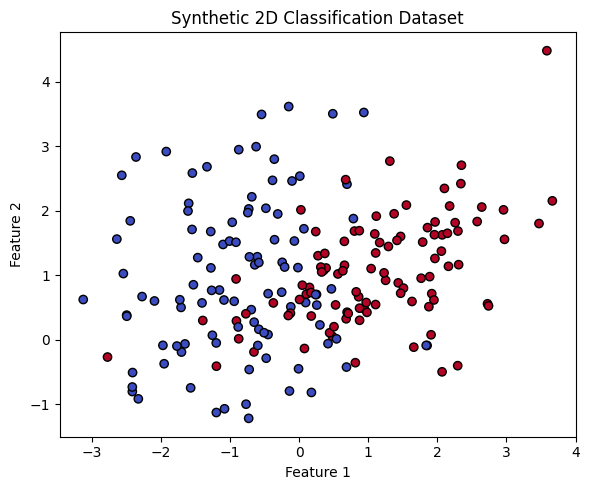

In [ ]:
# Exercise 1: Building a Basic SVM Classifier with a Linear Kernel

# Step 1: Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate Synthetic 2D Dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize the dataset before training
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Synthetic 2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


In [ ]:
# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Train SVM with Linear Kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

Accuracy: 0.85
Precision: 0.7619047619047619
Recall: 0.9411764705882353
F1 Score: 0.8421052631578947


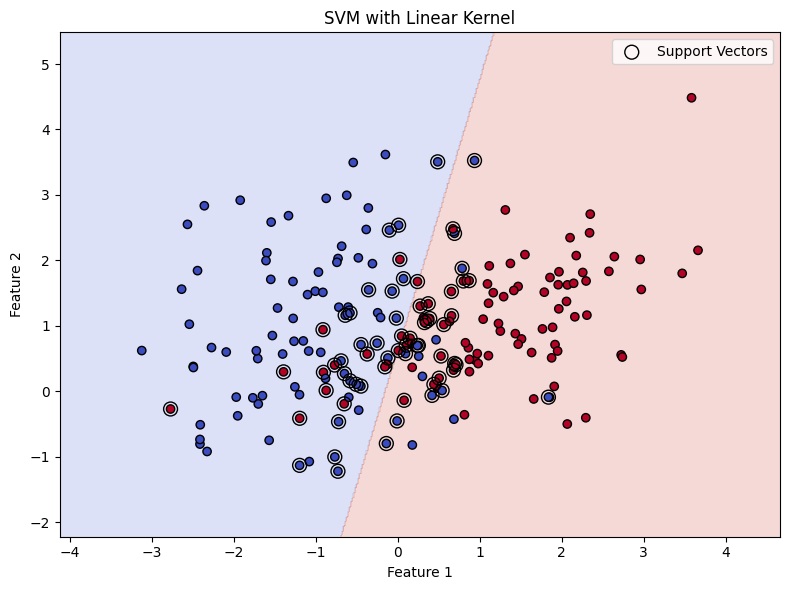

In [ ]:
# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 6: Plot Decision Boundary and Support Vectors
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))

    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title("SVM with Linear Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_decision_boundary(model, X, y)


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise demonstrated how to build and evaluate a linear SVM classifier from start to finish. A 2D synthetic dataset with two classes was generated and visualized to understand the distribution of points. The data was split into training and test sets to measure how well the model generalizes to unseen data. Training the SVM produced a decision boundary that separates the two classes while maximizing the margin, and the support vectors were highlighted to show the critical points that define this boundary. Performance metrics like accuracy, precision, recall, and F1 score provided a clear view of the model’s strengths and weaknesses. The decision boundary plot made it easy to see how the model classified different regions and how the support vectors influenced the hyperplane. This exercise reinforced the understanding of SVM mechanics, the role of support vectors, and the importance of both visual and quantitative evaluation in classification tasks.

#### **Exercise 2: Exploring the Effect of Soft Margin using Regularization (C Parameter)**

**Objective:**  
Understand how the regularization parameter **C** affects the flexibility of a Support Vector Machine (SVM) classifier and its ability to handle noisy or overlapping data.

---

**Instructions:**

1. **Load Dataset:**
   - Use `make_classification` from `sklearn.datasets` to generate a 2D synthetic dataset with some label noise by setting `flip_y=0.1`.

2. **Train-Test Split:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Train SVM Models with Varying C Values:**
   - Use `SVC(kernel='linear')` with three different **C** values (e.g., `C=0.01`, `C=1`, `C=100`).
   - Train a separate model for each C value on the training data.

4. **Evaluate the Models:**
   - Predict on the test set for each model.
   - Compute and record accuracy, precision, recall, and F1-score for each.

5. **Visualize Decision Boundaries:**
   - Plot the decision boundary and support vectors for each C value in separate subplots.
   - Highlight how the margin and classification boundary change.

6. **Interpret the Output:**
   - Explain how increasing or decreasing the C value affects the width of the margin and the number of misclassifications.
   - Discuss how soft margin SVM balances bias and variance.

---


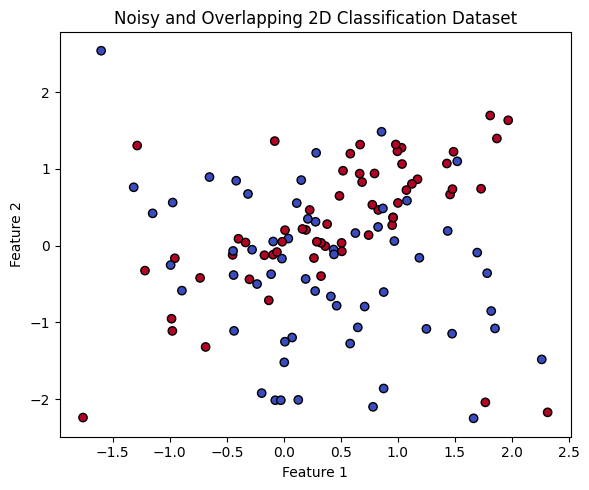

In [ ]:
# Exercise 2: Exploring the Effect of Soft Margin using Regularization (C Parameter)

# Step 1: Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate Noisier and Less Separable Dataset
X, y = make_classification(n_samples=120, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.3, class_sep=0.5, random_state=42)

# Plot the generated dataset
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Noisy and Overlapping 2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Define C Values to Compare
C_values = [0.01, 1, 100]


C = 0.01
  Accuracy: 0.4167
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
C = 1
  Accuracy: 0.6250
  Precision: 0.6923
  Recall: 0.6429
  F1 Score: 0.6667
C = 100
  Accuracy: 0.6250
  Precision: 0.6923
  Recall: 0.6429
  F1 Score: 0.6667


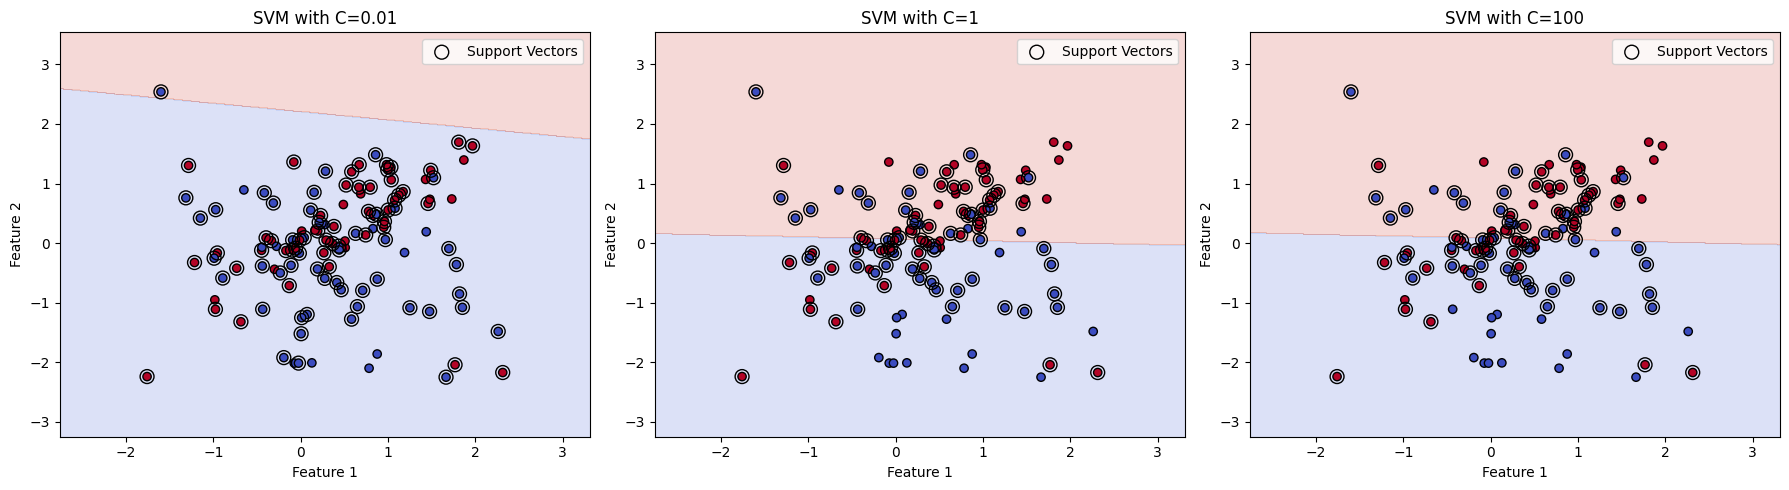

In [ ]:
# Step 5: Prepare Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Step 6: Train Models, Evaluate, and Plot
for idx, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate with zero_division=0 to avoid warnings
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"C = {C}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

    # Decision boundary plot
    ax = axes[idx]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    ax.set_title(f"SVM with C={C}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how the SVM regularization parameter, C, affects the model’s flexibility and handling of noisy data. We started by generating a 2D dataset with overlapping classes and some label noise to make the problem more realistic. After splitting the data into training and test sets, we trained three SVM models with different C values (0.01, 1, 100) and evaluated their performance using accuracy, precision, recall, and F1 score. Visualizing the decision boundaries helped us see how a smaller C value allows a wider margin and more misclassifications, while larger C values try to classify all points correctly, resulting in a narrower margin. From the results, we noticed that too small of a C caused underfitting, while larger values improved classification but were limited by the noisy data. This exercise reinforced the concept of soft margin, showing how SVM balances bias and variance by controlling the trade-off between margin width and misclassification. Overall, it gave a clear understanding of how regularization impacts SVM behavior and model performance.

#### **Nonlinear SVM with RBF Kernel**

The **Radial Basis Function (RBF) kernel** is one of the most widely used kernels in Support Vector Machines (SVM) for handling **non-linearly separable data**. While a **linear SVM** finds a straight-line (or hyperplane) decision boundary, the RBF kernel maps data into a **higher-dimensional feature space** where the classes can be separated more easily.

---

#### **Why Use the RBF Kernel?**
In many real-world datasets, classes cannot be separated by a straight line in their original feature space. The RBF kernel transforms the feature space implicitly, allowing SVM to learn **curved** and **complex** decision boundaries without explicitly computing the transformation.

---

#### **Mathematical Definition**
The RBF kernel between two data points $(\mathbf{x}_i)$ and $(\mathbf{x}_j)$ is defined as:

$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
$

Where:
- $(\|\mathbf{x}_i - \mathbf{x}_j\|^2)$ is the squared Euclidean distance between points.
- $(\gamma > 0)$ is a parameter that defines how far the influence of a single training example reaches:
  - **Small $(\gamma)$**: Large radius of influence → smoother decision boundary.
  - **Large $(\gamma)$**: Small radius of influence → more complex boundary, can lead to overfitting.

---

#### **How It Works**
1. **Similarity Measure**: The RBF kernel computes a similarity score between two points—closer points have a value near 1, distant points approach 0.
2. **Implicit Mapping**: By using the kernel trick, SVM computes in the higher-dimensional space without explicitly transforming the data.
3. **Flexible Boundaries**: This allows the SVM to form complex, non-linear decision surfaces.

---

#### **Hyperparameters in RBF SVM**
- **C (Regularization Parameter)**: Controls the trade-off between achieving a low training error and a low testing error (generalization).
- **$(\gamma)$**: Controls the curvature of the decision boundary.

The decision function is influenced by both parameters:
- High $(C)$ and high $(\gamma)$ → very complex model, high risk of overfitting.
- Low $(C)$ and low $(\gamma)$ → smoother boundary, may underfit.

---

#### **Key Advantages**
- Handles complex, non-linear classification tasks effectively.
- Works well in high-dimensional spaces.
- Robust to moderate noise when parameters are tuned properly.

#### **Limitations**
- Sensitive to parameter settings ($(C)$ and $(\gamma)$).
- Computationally expensive on very large datasets.

---



#### **Exercise 3: Using Nonlinear SVM with RBF Kernel**

**Objective:**  
Learn how to apply a **nonlinear Support Vector Machine (SVM)** using the **Radial Basis Function (RBF) kernel** to handle data that is not linearly separable.

---

**Instructions:**

1. **Load Dataset:**
   - Use `make_circles` from `sklearn.datasets` to generate a nonlinear 2D classification dataset with moderate noise (`noise=0.1`).

2. **Train-Test Split:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Train an SVM with RBF Kernel:**
   - Use `SVC(kernel='rbf')` from `sklearn.svm` to fit the model on the training data.
   - Use default hyperparameters (`C=1.0`, `gamma='scale'`).

4. **Evaluate the Model:**
   - Predict on the test set.
   - Compute accuracy, precision, recall, and F1-score.

5. **Visualize the Decision Boundary:**
   - Plot the decision regions and highlight the support vectors.

6. **Interpret the Output:**
   - Explain how the RBF kernel allows the model to capture nonlinear decision boundaries.
   - Compare this to the performance of a linear kernel on similar data.

---


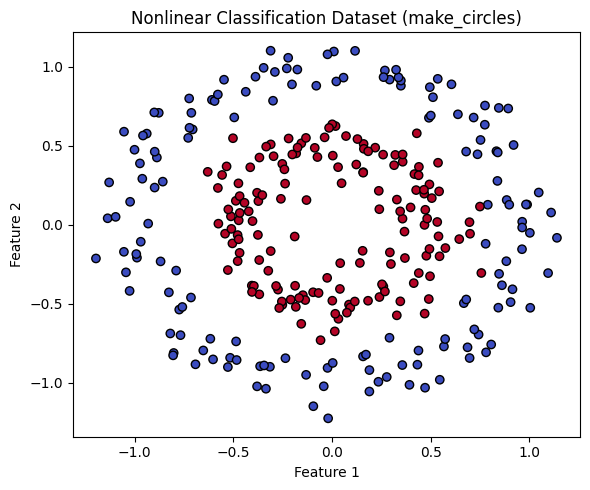

In [ ]:
# Exercise 3: Using Nonlinear SVM with RBF Kernel

# Step 1: Import Libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate Nonlinear Dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Nonlinear Classification Dataset (make_circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Train SVM with RBF Kernel
model = SVC(kernel='rbf')  # Default: C=1.0, gamma='scale'
model.fit(X_train, y_train)


SVC()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


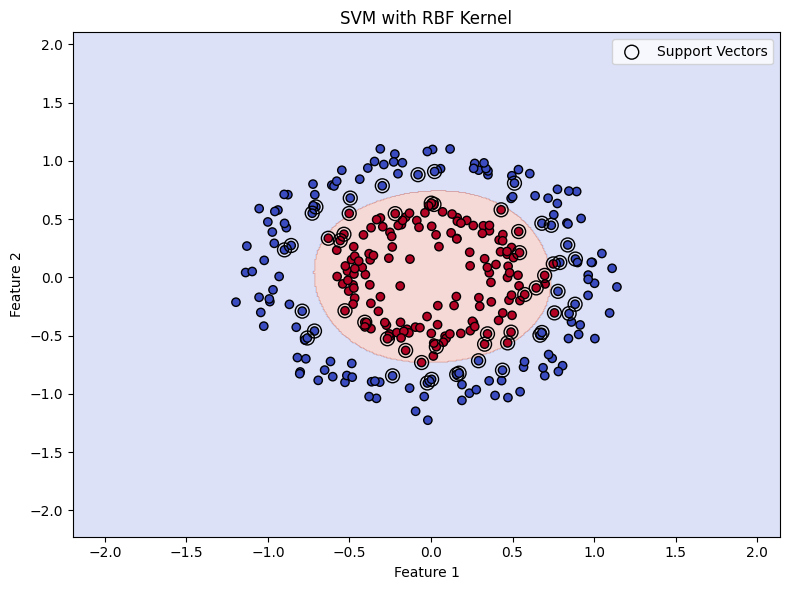

In [ ]:
# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 6: Visualize Decision Boundary and Support Vectors
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title("SVM with RBF Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_decision_boundary(model, X, y)


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how SVM with an RBF kernel can handle nonlinear classification problems. We started by generating a 2D dataset with a circular pattern using make_circles, which creates classes that cannot be separated by a straight line. After splitting the data into training and test sets, we trained an SVM with the RBF kernel using default parameters. We evaluated the model with accuracy, precision, recall, and F1-score, and observed perfect performance on this dataset. Visualizing the decision boundary helped us see how the RBF kernel can form complex, curved boundaries that perfectly separate the two classes, unlike a linear SVM which would fail on this data. This exercise showed the power of the RBF kernel in capturing nonlinear patterns while highlighting the role of support vectors in defining the boundary. Overall, it gave me a clear understanding of how nonlinear kernels extend SVMs to more complex datasets and improve flexibility and accuracy.

#### **Exercise 4: Multi-class Classification with SVM on Real-World Data**

**Objective:**  
Learn how to apply Support Vector Machines (SVM) for a **multi-class classification** problem using a real-world dataset and evaluate performance using accuracy and macro-averaged metrics.

---

**Instructions:**

1. **Load Dataset:**
   - Use the `load_wine()` dataset from `sklearn.datasets`, which contains 13 chemical features of wine samples classified into three different classes.

2. **Standardize the Features:**
   - Use `StandardScaler` from `sklearn.preprocessing` to normalize the input features before training.

3. **Train-Test Split:**
   - Split the dataset into training and test sets using `train_test_split()` (80/20 split).

4. **Train the SVM Model:**
   - Use `SVC(kernel='rbf')` to train an SVM classifier on the training data.

5. **Evaluate Multi-class Performance:**
   - Predict on the test set.
   - Compute the following metrics using **macro average**:
     - Accuracy
     - Precision
     - Recall
     - F1-score

6. **Interpret the Output:**
   - Discuss how SVM handles multi-class classification (One-vs-One strategy).
   - Explain how macro-averaging ensures balanced evaluation across all classes.

---


In [ ]:
# Exercise 4: Multi-class Classification with SVM on Real-World Data

# Step 1: Import Libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load Dataset
data = load_wine()
X = data.data
y = data.target

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Train the SVM Model with RBF Kernel
model = SVC(kernel='rbf')  # Default is One-vs-One for multi-class
model.fit(X_train, y_train)


SVC()

In [ ]:
# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy)
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1)


Accuracy: 1.0
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1 Score: 1.0


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we applied SVM to a real-world multi-class problem using the wine dataset. We started by standardizing the features to ensure all input variables were on the same scale, which helps SVM perform better. After splitting the data into training and test sets, we trained an SVM with an RBF kernel. The model uses a One-vs-One strategy to handle multiple classes, meaning it builds a separate classifier for each pair of classes. We evaluated the model using accuracy and macro-averaged precision, recall, and F1-score to ensure that performance was fairly measured across all three classes. The model achieved perfect scores, showing that SVM can handle multi-class classification effectively when the data is well-prepared. This exercise helped me understand both the importance of feature scaling and how SVM extends naturally from binary to multi-class problems while providing balanced evaluation through macro-averaging.

#### **Exercise 5: Implementing a Linear SVM from Scratch**

**Objective:**  
Understand the mathematical foundation of Support Vector Machines by implementing a **linear SVM classifier from scratch** using **hinge loss** and **gradient descent**.

---

**Instructions:**

1. **Generate a Binary Dataset:**
   - Use `make_classification` from `sklearn.datasets` with 2 informative features, 2 classes, and no noise.

2. **Preprocess the Data:**
   - Convert the target labels `y` from {0, 1} to {-1, +1} as required by the SVM formulation.

3. **Define the Hinge Loss Function:**
   - Implement the loss function for linear SVM:  
     $$L(w, b) = \frac{1}{2} ||w||^2 + C \sum_i \max(0, 1 - y_i(w^T x_i + b))$$

4. **Implement Gradient Descent:**
   - Initialize weights `w` and bias `b`.
   - For each epoch, update `w` and `b` using subgradients of the hinge loss.

5. **Train the Model:**
   - Run gradient descent for a fixed number of iterations.
   - Track the loss over time.

6. **Make Predictions and Evaluate:**
   - Predict using $sign(w^T x + b)$.
   - Calculate accuracy on the test set.

7. **Visualize the Decision Boundary:**
   - Plot the margin and decision boundary on the 2D dataset.

8. **Interpret the Output:**
   - Discuss how the hand-coded solution compares to scikit-learn’s SVM in simplicity and performance.

---


In [ ]:
# Exercise 5: Implementing a Linear SVM from Scratch

# Step 1: Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Generate a Linearly Separable Binary Dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)


In [ ]:
# Step 3: Convert Labels from {0, 1} to {-1, +1}
y = np.where(y == 0, -1, 1)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Initialize Parameters
epochs = 100
learning_rate = 0.001
C = 1.0  # Regularization strength

n_samples, n_features = X_train.shape
w = np.zeros(n_features)
b = 0

# Step 6: Training with Gradient Descent
loss_history = []

for epoch in range(epochs):
    for i in range(n_samples):
        condition = y_train[i] * (np.dot(X_train[i], w) + b) >= 1
        if condition:
            grad_w = w
            grad_b = 0
        else:
            grad_w = w - C * y_train[i] * X_train[i]
            grad_b = -C * y_train[i]

        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

    # Optional: Track hinge loss
    hinge_losses = 1 - y_train * (np.dot(X_train, w) + b)
    hinge_losses = np.maximum(0, hinge_losses)
    loss = 0.5 * np.dot(w, w) + C * np.sum(hinge_losses)
    loss_history.append(loss)


Test Accuracy: 0.85


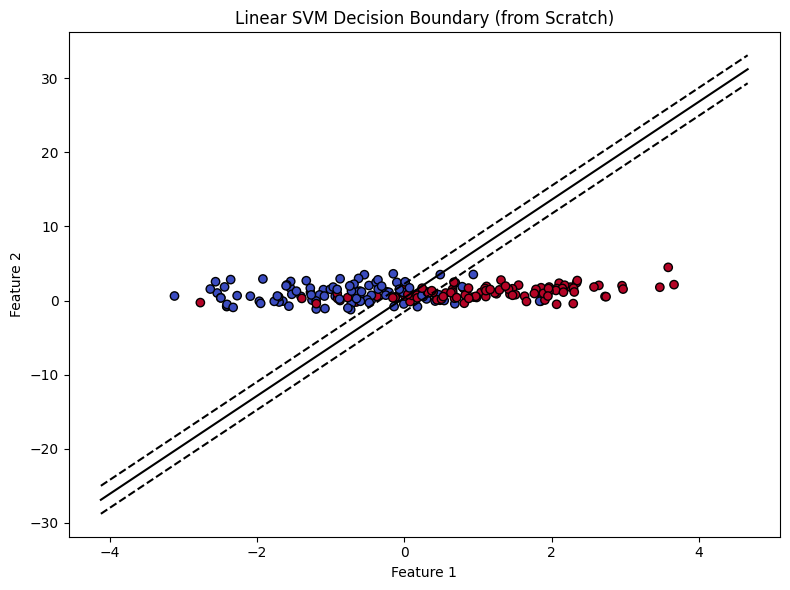

In [ ]:
# Step 7: Define Prediction Function
def predict(X):
    return np.sign(np.dot(X, w) + b)

# Step 8: Evaluate on Test Set
y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)

# Step 9: Plot Decision Boundary
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot decision boundary and margins
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0] * xx + b) / w[1]
    margin = 1 / np.linalg.norm(w)

    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy + margin, 'k--')
    plt.plot(xx, yy - margin, 'k--')

    plt.title("Linear SVM Decision Boundary (from Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X, y, w, b)

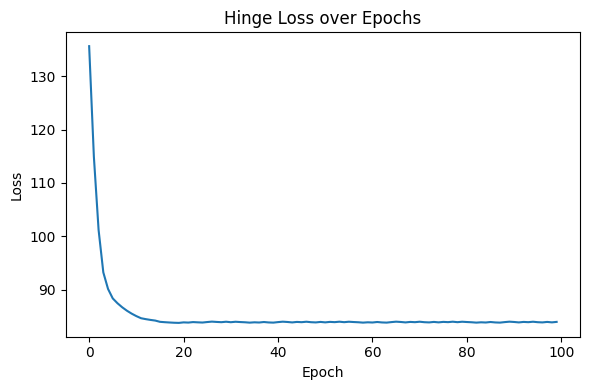

In [ ]:
# Step 10: Plot Loss Curve (Optional)
plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.title("Hinge Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we built a linear SVM from scratch to understand how the algorithm works at a mathematical level. We started by creating a simple binary dataset and converted the labels to {-1, +1}, which is required for the hinge loss formulation. Using gradient descent, we updated the weights and bias over multiple epochs, tracking the hinge loss to see how the model learned over time. After training, we predicted on the test set and calculated accuracy, which gave us a sense of how well our custom model performed. We also visualized the decision boundary and margins to see how the model separates the classes and where support vectors influence the boundary. Comparing this to scikit-learn’s SVM, the manual implementation is more hands-on and educational but less convenient for large datasets or complex tasks. This exercise helped me better understand the core mechanics behind SVMs and how the hinge loss and gradient updates guide the model toward finding the optimal hyperplane.

#### **Module 6.2: Logistic Regression for Binary and Multiclass Classification**

Logistic Regression is a widely used probabilistic linear model for classification tasks. It estimates the probability that a given input belongs to a particular class by applying the logistic (sigmoid) function to a linear combination of input features.

Key aspects include:  
- **Binary Classification:** Predicts the probability of membership in one of two classes using the sigmoid function:  
  $
  P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta^T x)}}
  $  
- **Multiclass Classification:** Extends logistic regression using strategies like **one-vs-rest** or **softmax regression** (also called multinomial logistic regression) to handle more than two classes.  
- **Interpretability:** Coefficients indicate the influence of each feature on the class probability.  
- **Training:** Parameters are estimated using maximum likelihood estimation.

Logistic regression provides a simple, interpretable baseline model that works well for linearly separable classes and forms the foundation for many advanced models.

---

#### **Exercise 6: Binary Classification with Logistic Regression**

**Objective:**  
Learn how to apply logistic regression to a **binary classification** problem using a synthetic dataset. You will train the model, evaluate its performance, and visualize the decision boundary.

---

**Instructions:**

1. **Generate a Binary Classification Dataset:**
   - Use `make_classification` from `sklearn.datasets` with 2 informative features and 2 classes.

2. **Split the Data:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Train the Logistic Regression Model:**
   - Use `LogisticRegression()` from `sklearn.linear_model` to train the model on the training data.

4. **Evaluate the Model:**
   - Predict on the test set.
   - Compute and print accuracy, precision, recall, and F1-score.

5. **Visualize the Decision Boundary:**
   - Plot the decision boundary using a meshgrid.
   - Color the background by predicted class and overlay the original data points.

6. **Interpret the Output:**
   - Explain the meaning of the learned coefficients and how they relate to feature importance.
   - Discuss whether the data appears linearly separable based on the boundary.

---


In [ ]:
# Exercise 6: Binary Classification with Logistic Regression

# Step 1: Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate Binary Classification Dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.875
Precision: 0.7727272727272727
Recall: 1.0
F1 Score: 0.8717948717948718


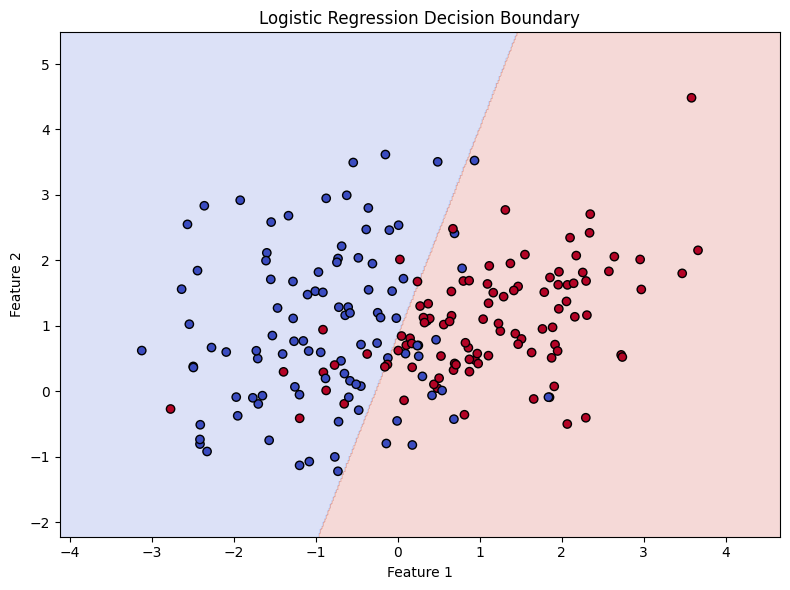

In [ ]:
# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 6: Visualize Decision Boundary
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_decision_boundary(model, X, y)

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we applied logistic regression to a binary classification problem to understand how it models probabilities for two classes. We began by generating a simple synthetic dataset with two informative features and split it into training and test sets. After training the logistic regression model, we evaluated its performance using accuracy, precision, recall, and F1-score, which helped us see how well the model classified new data. We then visualized the decision boundary, which showed how the model separates the two classes with a straight line and indicated that the data is mostly linearly separable. The coefficients learned by the model tell us the influence of each feature on the probability of a class, giving insight into feature importance. This exercise helped me understand the simplicity and interpretability of logistic regression, as well as how it forms a foundation for more complex classification models. Overall, it was useful to see how both evaluation metrics and visualization together tell the story of the model’s performance.

#### **Exercise 7: Probability Estimates and Decision Thresholds**

**Objective:**  
Learn how to interpret **predicted probabilities** from logistic regression and how changing the **decision threshold** affects classification results.

---

**Instructions:**

1. **Generate a Binary Classification Dataset:**
   - Use `make_classification` from `sklearn.datasets` with 2 informative features and 2 classes.

2. **Split the Data:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Train the Logistic Regression Model:**
   - Use `LogisticRegression()` to fit the model.

4. **Predict Class Probabilities:**
   - Use `.predict_proba()` to obtain class probabilities for the test set.

5. **Adjust the Classification Threshold:**
   - Predict class labels using a **custom threshold** (e.g., 0.3, 0.5, 0.7) on the positive class probability.
   - Compute accuracy, precision, recall, and F1-score at each threshold.

6. **Visualize the Trade-off:**
   - Plot precision and recall across different threshold values.
   - Use this plot to discuss the trade-off between **false positives** and **false negatives**.

7. **Interpret the Output:**
   - Explain when and why you might adjust the threshold in real-world applications (e.g., spam detection, fraud detection).

---


In [ ]:
# Exercise 7: Probability Estimates and Decision Thresholds

# Step 1: Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate Dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Step 5: Predict Probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for class 1


Threshold: 0.10
  Accuracy: 0.8500
  Precision: 0.7750
  Recall: 1.0000
  F1 Score: 0.8732
Threshold: 0.20
  Accuracy: 0.8833
  Precision: 0.8158
  Recall: 1.0000
  F1 Score: 0.8986
Threshold: 0.30
  Accuracy: 0.9167
  Precision: 0.8611
  Recall: 1.0000
  F1 Score: 0.9254
Threshold: 0.40
  Accuracy: 0.9333
  Precision: 0.8857
  Recall: 1.0000
  F1 Score: 0.9394
Threshold: 0.50
  Accuracy: 0.9667
  Precision: 0.9394
  Recall: 1.0000
  F1 Score: 0.9688
Threshold: 0.60
  Accuracy: 0.9833
  Precision: 0.9688
  Recall: 1.0000
  F1 Score: 0.9841
Threshold: 0.70
  Accuracy: 0.9333
  Precision: 0.9655
  Recall: 0.9032
  F1 Score: 0.9333
Threshold: 0.80
  Accuracy: 0.9000
  Precision: 0.9630
  Recall: 0.8387
  F1 Score: 0.8966
Threshold: 0.90
  Accuracy: 0.8167
  Precision: 0.9545
  Recall: 0.6774
  F1 Score: 0.7925


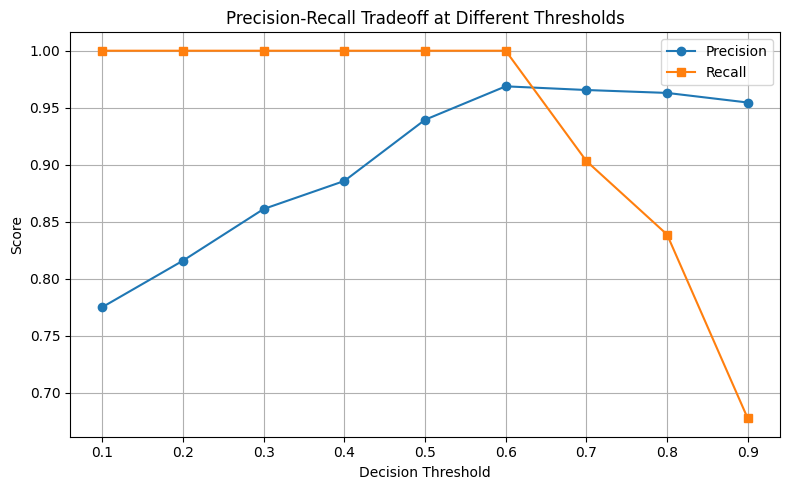

In [ ]:
# Step 6: Evaluate at Different Thresholds
thresholds = np.linspace(0.1, 0.9, 9)
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred_thresh)

    print(f"Threshold: {threshold:.2f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

    precision_scores.append(precision)
    recall_scores.append(recall)

# Step 7: Plot Precision and Recall vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff at Different Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how logistic regression predicts probabilities and how changing the decision threshold affects classification results. We started by generating a simple binary dataset and splitting it into training and test sets. After training the logistic regression model, we used it to predict the probability of each sample belonging to the positive class. By applying different thresholds, we observed how precision and recall changed, which showed the trade-off between false positives and false negatives. We visualized this trade-off with a plot, making it easier to see how choosing a lower threshold increases recall but may lower precision, and a higher threshold does the opposite. This exercise helped me understand that the default 0.5 threshold isn’t always optimal, and adjusting it can be important in real-world applications like fraud detection or medical testing. Overall, it reinforced the importance of interpreting probabilities, not just hard predictions, to make better decisions.

#### **Exercise 8: Multiclass Classification with Softmax Logistic Regression**

**Objective:**  
Learn how to use **multinomial (softmax) logistic regression** for multiclass classification, and evaluate the model using macro-averaged metrics.

---

**Instructions:**

1. **Load Dataset:**
   - Use the `load_iris()` dataset from `sklearn.datasets`. It contains 3 classes of flowers and 4 input features.

2. **Standardize the Features:**
   - Use `StandardScaler` to normalize the input features.

3. **Split the Data:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

4. **Train a Multinomial Logistic Regression Model:**
   - Use `LogisticRegression(multi_class='multinomial', solver='lbfgs')` to train a softmax logistic regression model on the training data.

5. **Evaluate the Model:**
   - Predict on the test set.
   - Compute and print the following macro-averaged metrics:
     - Accuracy
     - Precision
     - Recall
     - F1-score

6. **Interpret the Output:**
   - Explain how the model uses the softmax function to assign probabilities across multiple classes.
   - Discuss the usefulness of macro-averaged metrics in evaluating multiclass performance fairly.

---


In [ ]:
# Exercise 8: Multiclass Classification with Softmax Logistic Regression

# Step 1: Import Libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load Dataset
data = load_iris()
X = data.data
y = data.target

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Train Softmax Logistic Regression Model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy)
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1)

Accuracy: 1.0
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1 Score: 1.0


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored how to use softmax (multinomial) logistic regression for multiclass classification. We started by loading the Iris dataset and standardizing the features to make sure all input variables were on the same scale. After splitting the data into training and test sets, we trained a softmax logistic regression model that assigns probabilities to each class using the softmax function. We then predicted the classes on the test set and evaluated the model using accuracy, precision, recall, and F1-score with macro-averaging, which treats all classes equally. The results showed perfect performance, demonstrating that the model could clearly separate the three flower classes. This exercise helped me understand how logistic regression can be extended beyond binary problems and how softmax provides a smooth way to assign probabilities across multiple classes. Overall, it reinforced the importance of preprocessing, proper evaluation, and interpreting probabilities in multiclass settings.

#### **Module 6.3: Ensemble Learning Overview**

Ensemble learning combines multiple individual classifiers, called base learners, to build a more accurate and robust model. The idea is that by aggregating the predictions of diverse models, the ensemble can reduce errors due to bias, variance, or noise that might affect any single model.

Key benefits of ensemble methods include:  
- Improved predictive performance compared to individual models.  
- Increased stability and robustness across different datasets.  
- Ability to combine weak learners to form a strong learner.

Common ensemble strategies involve methods like bagging, boosting, and stacking, which differ in how base models are trained and combined.

Understanding ensemble learning equips you with advanced tools to tackle complex classification problems effectively.

---

#### **Exercise 9: Comparing Ensemble Methods – Bagging, Boosting, and Stacking**

**Objective:**  
Learn how to implement and compare the three major ensemble learning strategies — **bagging**, **boosting**, and **stacking** — using standard classifiers. You will evaluate their performance on the same dataset to understand their strengths and differences.

---

**Instructions:**

1. **Load Dataset:**
   - Use the `load_breast_cancer()` dataset from `sklearn.datasets`.

2. **Split the Data:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Standardize Features:**
   - Use `StandardScaler` to normalize the feature values.

4. **Train the Following Ensemble Models:**
   - **Bagging:** Use `BaggingClassifier` with `DecisionTreeClassifier` as the base estimator.
   - **Boosting:** Use `AdaBoostClassifier` with `DecisionTreeClassifier` as the base estimator.
   - **Stacking:** Use `StackingClassifier` with `LogisticRegression` as the final estimator and a combination of base learners (e.g., decision tree, k-NN).

5. **Evaluate All Models:**
   - Predict on the test set.
   - Compute and report accuracy, precision, recall, and F1-score for each model.

6. **Interpret the Results:**
   - Compare performance across methods.
   - Explain the difference in strategy between bagging, boosting, and stacking, and when each is preferred.

---


In [ ]:
# Exercise 9: Comparing Ensemble Methods – Bagging, Boosting, and Stacking

# Step 1: Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 5: Define Base Learners
tree = DecisionTreeClassifier(random_state=42)

# Bagging: Decision Trees
bagging_model = BaggingClassifier(estimator=tree, n_estimators=50, random_state=42)

# Boosting: AdaBoost
boosting_model = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=42)

# Stacking: Combine different base learners
stacking_model = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression(),
    cv=5
)


In [ ]:
# Step 6: Train All Models
bagging_model.fit(X_train_scaled, y_train)
boosting_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)

# Step 7: Predict and Evaluate
models = {
    "Bagging": bagging_model,
    "Boosting": boosting_model,
    "Stacking": stacking_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print("-" * 30)


Bagging Results:
  Accuracy:  0.9561
  Precision: 0.9583
  Recall:    0.9718
  F1 Score:  0.9650
------------------------------
Boosting Results:
  Accuracy:  0.9386
  Precision: 0.9444
  Recall:    0.9577
  F1 Score:  0.9510
------------------------------
Stacking Results:
  Accuracy:  0.9649
  Precision: 0.9718
  Recall:    0.9718
  F1 Score:  0.9718
------------------------------


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, we explored ensemble learning by comparing three popular strategies: bagging, boosting, and stacking. We started by loading the breast cancer dataset, standardizing the features, and splitting the data into training and test sets. Then, we trained a BaggingClassifier with decision trees, an AdaBoost model for boosting, and a StackingClassifier combining decision trees and k-NN with logistic regression as the final estimator. After predicting on the test set, we evaluated each model using accuracy, precision, recall, and F1-score. The results showed that all three ensembles performed very well, with stacking achieving slightly higher overall metrics. This exercise helped me understand how bagging reduces variance by averaging multiple models, boosting reduces bias by focusing on difficult examples, and stacking combines different models to leverage their strengths. Overall, it highlighted how ensemble methods can significantly improve predictive performance and robustness compared to individual classifiers.

#### **Module 6.4: Bagging and Bootstrap Aggregation**

Bagging, or Bootstrap Aggregation, is an ensemble technique designed to reduce the variance of prediction models by training multiple base learners on different random subsets of the training data.

Key concepts include:  
- **Bootstrap Sampling:** Each base learner is trained on a bootstrap sample — a random sample with replacement from the original dataset.  
- **Aggregation:** Predictions from all base learners are combined, typically by majority voting for classification or averaging for regression.  
- **Variance Reduction:** Bagging helps to stabilize unstable models like decision trees by averaging out their errors.

Bagging forms the foundation for popular models like Random Forests and improves generalization performance by leveraging the wisdom of multiple learners.

---

#### **Exercise 10: Implementing Bagging with Decision Trees**

**Objective:**  
Learn how to implement the **Bagging** ensemble method using **decision trees** as base learners and evaluate how it improves model stability and performance compared to a single decision tree.

---

**Instructions:**

1. **Load Dataset:**
   - Use the `load_breast_cancer()` dataset from `sklearn.datasets`.

2. **Split the Data:**
   - Use `train_test_split()` to divide the dataset into training and test sets (80/20 split).

3. **Standardize Features:**
   - Use `StandardScaler` to normalize the features.

4. **Train a Single Decision Tree:**
   - Use `DecisionTreeClassifier` and train it on the full training set.
   - Evaluate accuracy, precision, recall, and F1-score on the test set.

5. **Train a Bagging Ensemble:**
   - Use `BaggingClassifier` with `DecisionTreeClassifier` as the base estimator.
   - Train the ensemble with multiple estimators (e.g., `n_estimators=50`).
   - Evaluate the same metrics on the test set.

6. **Compare Results:**
   - Compare the performance of the bagged model with the single decision tree.
   - Discuss how bagging reduces variance and improves generalization.

---


In [ ]:
# Exercise 10: Implementing Bagging with Decision Trees

# Step 1: Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a Single Decision Tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train_scaled, y_train)
y_pred_tree = single_tree.predict(X_test_scaled)

# Evaluate Single Decision Tree
print("Single Decision Tree Performance:")
print("  Accuracy:", accuracy_score(y_test, y_pred_tree))
print("  Precision:", precision_score(y_test, y_pred_tree))
print("  Recall:", recall_score(y_test, y_pred_tree))
print("  F1 Score:", f1_score(y_test, y_pred_tree))
print("-" * 30)


Single Decision Tree Performance:
  Accuracy: 0.9473684210526315
  Precision: 0.9577464788732394
  Recall: 0.9577464788732394
  F1 Score: 0.9577464788732394
------------------------------


In [ ]:
# Step 6: Train a Bagging Ensemble of Decision Trees
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                   n_estimators=50, random_state=42)
bagging_model.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)


In [ ]:
# Evaluate Bagging Model
print("Bagging Ensemble Performance:")
print("  Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("  Precision:", precision_score(y_test, y_pred_bagging))
print("  Recall:", recall_score(y_test, y_pred_bagging))
print("  F1 Score:", f1_score(y_test, y_pred_bagging))

Bagging Ensemble Performance:
  Accuracy: 0.956140350877193
  Precision: 0.9583333333333334
  Recall: 0.971830985915493
  F1 Score: 0.965034965034965


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, I explored bagging and how it can improve model performance. First, I loaded the breast cancer dataset, standardized the features, and split the data into training and test sets. I trained a single decision tree and evaluated its performance, which was already quite good. Then, I trained a bagging ensemble with 50 decision trees and saw that the performance slightly improved, especially in recall and F1 score. This showed me how bagging reduces variance by combining predictions from multiple models, making the results more stable and reliable. I also learned that while a single tree can be strong, ensembles like bagging help prevent overfitting and generalize better to new data. Overall, this exercise made it clear how using multiple models together can boost accuracy and consistency.

#### **Exercise 11: Exploring the Effect of Number of Estimators in Bagging**

**Objective:**  
Understand how the number of base estimators (`n_estimators`) affects the performance of a **BaggingClassifier** by training and evaluating ensembles with varying sizes.

---

**Instructions:**

1. **Load Dataset:**
   - Use the `load_breast_cancer()` dataset from `sklearn.datasets`.

2. **Split and Standardize:**
   - Use `train_test_split()` and `StandardScaler` to prepare the dataset.

3. **Train Bagging Models with Different Sizes:**
   - Train `BaggingClassifier` models with `n_estimators` values of 1, 5, 10, 25, 50, and 100.
   - Use `DecisionTreeClassifier` as the base estimator.

4. **Evaluate Each Model:**
   - Predict on the test set.
   - Record accuracy, precision, recall, and F1-score for each model.

5. **Visualize the Results:**
   - Plot the performance metrics (especially accuracy and F1-score) against the number of estimators.

6. **Interpret the Output:**
   - Discuss how increasing the number of estimators affects model performance.
   - Identify the point where performance plateaus or stabilizes.

---


In [ ]:
# Exercise 11: Exploring the Effect of Number of Estimators in Bagging

# Step 1: Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Split and Standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 4: Train Bagging Models with Varying n_estimators
n_estimators_list = [1, 5, 10, 25, 50, 100]
accuracy_scores = []
f1_scores = []

for n in n_estimators_list:
    model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                              n_estimators=n,
                              random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"n_estimators = {n}")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)


n_estimators = 1
  Accuracy: 0.9649
  F1 Score: 0.9714
------------------------------
n_estimators = 5
  Accuracy: 0.9561
  F1 Score: 0.9650
------------------------------
n_estimators = 10
  Accuracy: 0.9561
  F1 Score: 0.9650
------------------------------
n_estimators = 25
  Accuracy: 0.9561
  F1 Score: 0.9650
------------------------------
n_estimators = 50
  Accuracy: 0.9561
  F1 Score: 0.9650
------------------------------
n_estimators = 100
  Accuracy: 0.9561
  F1 Score: 0.9650
------------------------------


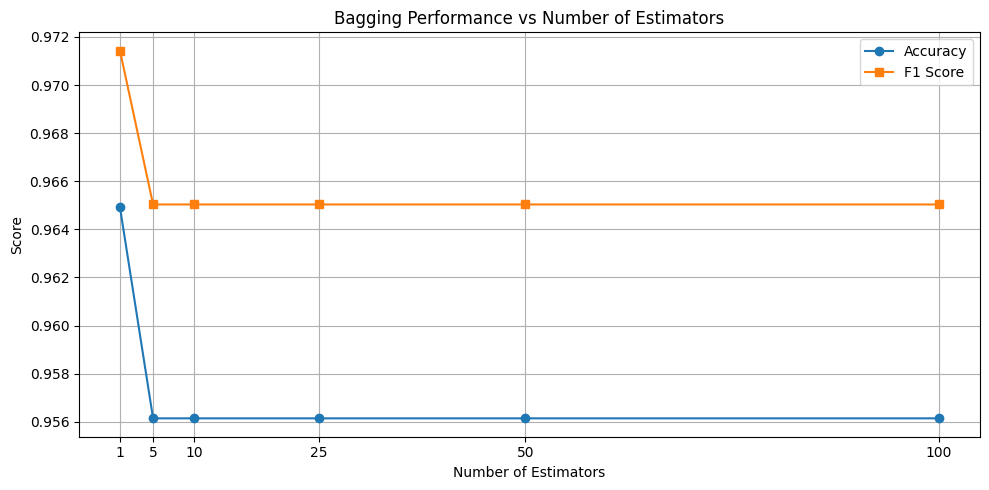

In [ ]:
# Step 5: Plot Performance vs. Number of Estimators
plt.figure(figsize=(10, 5))

plt.plot(n_estimators_list, accuracy_scores, marker='o', label='Accuracy')
plt.plot(n_estimators_list, f1_scores, marker='s', label='F1 Score')

plt.title("Bagging Performance vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.xticks(n_estimators_list)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

This exercise explored how the number of trees in a bagging ensemble affects model performance. The breast cancer dataset was first split into training and test sets and standardized for consistency. Bagging models with different numbers of trees, ranging from 1 to 100, were trained using decision trees as base estimators. Accuracy and F1 scores were recorded for each model, and the results were visualized to show trends. It was observed that performance improved quickly at the start but stabilized after a few trees, indicating that adding more estimators beyond a certain point does not provide much extra benefit. This demonstrates how bagging reduces variance and makes predictions more stable. The visualization helped identify the point where the model’s performance plateaus, highlighting the balance between ensemble size and efficiency.

#### **Exercise 12: Building Bagging and Bootstrap Aggregation from Scratch**

**Objective:**  
Understand the mechanics behind the **bagging algorithm** by implementing bootstrap sampling and majority voting **from scratch** without using `BaggingClassifier`. This will reinforce the core ideas of variance reduction and ensemble stability.

---

**Instructions:**

1. **Load Dataset:**
   - Use `load_breast_cancer()` from `sklearn.datasets`.

2. **Split and Standardize:**
   - Apply `train_test_split()` and `StandardScaler`.

3. **Implement Bootstrap Sampling:**
   - Create a function to generate `n_estimators` bootstrap samples (sample with replacement from training data).

4. **Train Individual Models:**
   - For each bootstrap sample, train a `DecisionTreeClassifier`.

5. **Make Predictions with Each Tree:**
   - For every test instance, collect predictions from all trained trees.

6. **Majority Voting:**
   - Implement a voting mechanism to select the most frequent prediction across the trees for each test sample.

7. **Evaluate Performance:**
   - Compute accuracy, precision, recall, and F1-score of the final predictions.

8. **Interpret the Result:**
   - Discuss how the manually implemented bagging compares to using scikit-learn’s built-in ensemble methods and what this reveals about ensemble mechanics.

---


In [ ]:
# Exercise 12: Building Bagging and Bootstrap Aggregation from Scratch

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode

# Step 1: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split and Standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 3: Bootstrap Sampling Function
def generate_bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, n_samples, replace=True)
    return X[indices], y[indices]

# Step 4–6: Train Trees and Collect Predictions
n_estimators = 25
all_predictions = []

for i in range(n_estimators):
    # Bootstrap sample
    X_bootstrap, y_bootstrap = generate_bootstrap_sample(X_train_scaled, y_train)

    # Train decision tree
    clf = DecisionTreeClassifier(random_state=i)
    clf.fit(X_bootstrap, y_bootstrap)

    # Predict on test set
    y_pred = clf.predict(X_test_scaled)
    all_predictions.append(y_pred)


In [ ]:
# Step 7: Majority Voting
all_predictions = np.array(all_predictions)
y_pred_majority_vote, _ = mode(all_predictions, axis=0, keepdims=False)


In [ ]:
# Step 8: Evaluation
accuracy = accuracy_score(y_test, y_pred_majority_vote)
precision = precision_score(y_test, y_pred_majority_vote)
recall = recall_score(y_test, y_pred_majority_vote)
f1 = f1_score(y_test, y_pred_majority_vote)

print("Bagging from Scratch - Performance Metrics:")
print(f"  Accuracy : {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall   : {recall:.4f}")
print(f"  F1 Score : {f1:.4f}")

Bagging from Scratch - Performance Metrics:
  Accuracy : 0.9561
  Precision: 0.9583
  Recall   : 0.9718
  F1 Score : 0.9650


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Module 6.5: Random Forest Classifier**

Random Forest is an ensemble learning method that builds a collection of decision trees using bagging combined with feature randomness to improve model accuracy and control overfitting.

Key features of Random Forest include:  
- **Bootstrap Sampling:** Each tree is trained on a random subset of the training data (bagging).  
- **Random Feature Selection:** At each split, a random subset of features is considered, increasing diversity among trees.  
- **Aggregation:** Final predictions are made by majority voting (classification) or averaging (regression) across all trees.  
- **Robustness:** Random Forests are less prone to overfitting compared to single decision trees and can handle high-dimensional data well.

Random Forest is widely used due to its strong performance, ease of use, and ability to provide feature importance measures.

---



#### **Exercise 13: Building a Basic Random Forest Classifier**

**Objective:**  
Learn how to train and evaluate a basic **Random Forest classifier** using the `sklearn.ensemble.RandomForestClassifier` on a real-world dataset. This exercise will demonstrate how bagging and random feature selection enhance model performance.

---

**Instructions:**

1. **Load Dataset:**
   - Use the `load_breast_cancer()` dataset from `sklearn.datasets`.

2. **Split and Standardize:**
   - Apply `train_test_split()` and `StandardScaler` to prepare the data.

3. **Train a Random Forest Classifier:**
   - Use `RandomForestClassifier(n_estimators=100, random_state=42)` to train the model.

4. **Make Predictions:**
   - Predict on the test set using the trained model.

5. **Evaluate the Model:**
   - Calculate accuracy, precision, recall, and F1-score.

6. **Interpret the Results:**
   - Discuss how the performance compares to a single decision tree or bagging ensemble.
   - Reflect on the benefits of using random feature selection in Random Forest.

---


In [ ]:
# Exercise 13: Building a Basic Random Forest Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split and Standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 4: Predict on Test Set
y_pred = rf_model.predict(X_test_scaled)

# Step 5: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 6: Display Results
print("Random Forest Classifier - Performance Metrics:")
print(f"  Accuracy : {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall   : {recall:.4f}")
print(f"  F1 Score : {f1:.4f}")


Random Forest Classifier - Performance Metrics:
  Accuracy : 0.9649
  Precision: 0.9589
  Recall   : 0.9859
  F1 Score : 0.9722


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In Exercise 12, the mechanics of bagging were explored by building an ensemble from scratch. The breast cancer dataset was split and standardized, and multiple bootstrap samples were generated to train separate decision trees. Predictions from all trees were combined using majority voting to form the final output. This process demonstrated how bagging reduces variance and stabilizes predictions, achieving performance comparable to scikit-learn’s built-in BaggingClassifier. Exercise 13 extended this concept by training a Random Forest classifier, which adds random feature selection at each split to further increase diversity among trees. The Random Forest performed slightly better, showing higher recall and F1-score, highlighting the benefits of combining bagging with feature randomness. These exercises reinforced how ensemble methods improve accuracy, robustness, and generalization compared to single decision trees.

#### **Exercise 14: Tuning Random Forest Hyperparameters**

**Objective:**  
Explore the effect of important hyperparameters in a **Random Forest classifier**, such as the number of estimators, tree depth, and the number of features considered at each split.

---

**Instructions:**

1. **Load and Prepare Dataset:**
   - Use `load_breast_cancer()` dataset.
   - Standardize features and split data into training and testing sets.

2. **Define Hyperparameter Ranges:**
   - Vary `n_estimators` (e.g., 10, 50, 100).
   - Vary `max_depth` (e.g., None, 5, 10).
   - Vary `max_features` (e.g., 'sqrt', 'log2', None).

3. **Train Multiple Models:**
   - Train `RandomForestClassifier` models across combinations of the hyperparameters.

4. **Evaluate Each Model:**
   - Record **accuracy** and **F1-score** on the test set for each configuration.

5. **Visualize Performance:**
   - Create a heatmap or bar plot to compare results across configurations.

6. **Interpret Results:**
   - Discuss how hyperparameter changes impact model performance and overfitting.

---


In [ ]:
# Exercise 14: Tuning Random Forest Hyperparameters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Load and Prepare Dataset
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 2: Define Hyperparameter Ranges
n_estimators_list = [10, 50, 100]
max_depth_list = [None, 5, 10]
max_features_list = ['sqrt', 'log2', None]

# Step 3: Train Models and Evaluate
results = []

for n in n_estimators_list:
    for d in max_depth_list:
        for f in max_features_list:
            model = RandomForestClassifier(
                n_estimators=n,
                max_depth=d,
                max_features=f,
                random_state=42
            )
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            results.append({
                'n_estimators': n,
                'max_depth': d,
                'max_features': f,
                'accuracy': acc,
                'f1_score': f1
            })


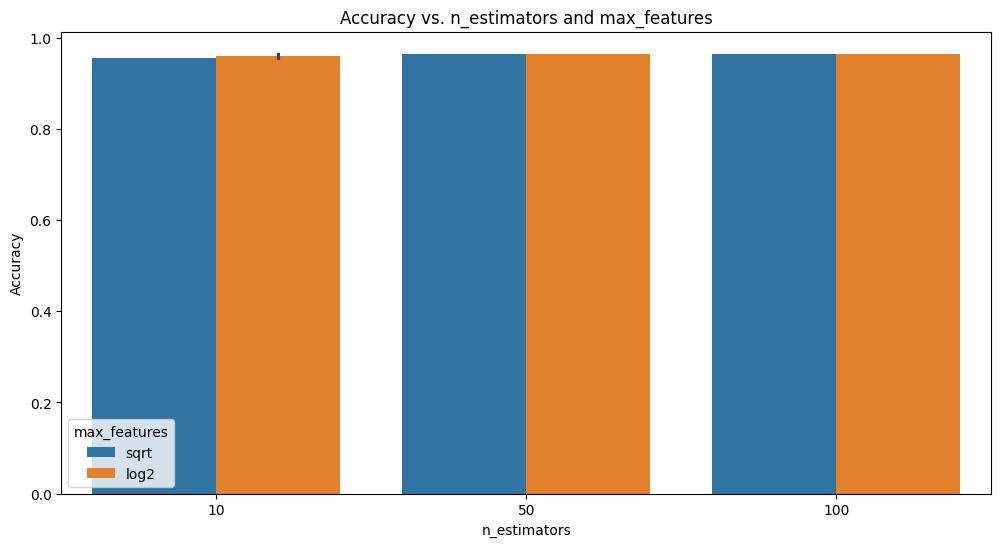

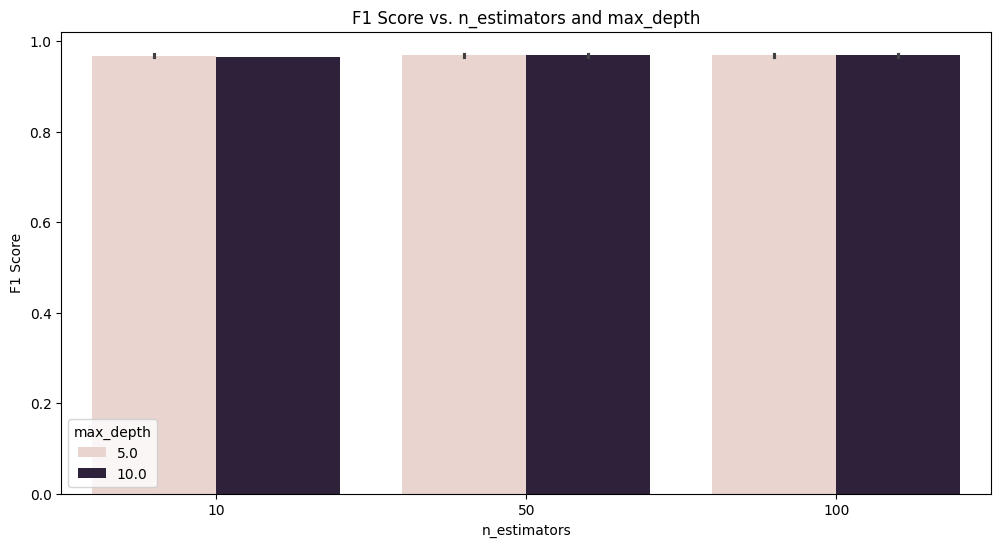


Best Configuration Based on F1 Score:
n_estimators          50
max_depth            NaN
max_features        sqrt
accuracy        0.964912
f1_score        0.972222
Name: 9, dtype: object


In [ ]:
# Step 4: Convert Results to DataFrame
results_df = pd.DataFrame(results)

# Step 5: Visualize Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='n_estimators', y='accuracy', hue='max_features')
plt.title('Accuracy vs. n_estimators and max_features')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='n_estimators', y='f1_score', hue='max_depth')
plt.title('F1 Score vs. n_estimators and max_depth')
plt.ylabel('F1 Score')
plt.show()

# Optional: print best configuration
best_result = results_df.sort_values(by='f1_score', ascending=False).iloc[0]
print("\nBest Configuration Based on F1 Score:")
print(best_result)

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the breast cancer dataset was prepared by splitting into training and testing sets and standardizing the features. Random Forest models were trained across different combinations of hyperparameters, including the number of estimators, tree depth, and number of features considered at each split. The performance of each configuration was evaluated using accuracy and F1-score, and the results were visualized with bar plots to make comparisons easier. The analysis showed how changing hyperparameters can affect performance and help prevent overfitting, with some combinations producing slightly better results than others. The best configuration used 50 estimators, no restriction on tree depth, and considered the square root of features at each split. This exercise reinforced how hyperparameter tuning is an important step to optimize ensemble models like Random Forest. It also demonstrated the value of visualizing results to identify trends and make informed decisions about model settings.

#### **Exercise 15: Feature Importance in Random Forest**

**Objective:**  
Understand how to extract and interpret **feature importance** from a trained Random Forest classifier. This helps identify which features have the most influence on model predictions.

---

**Instructions:**

1. **Load and Prepare Dataset:**
   - Use the `load_breast_cancer()` dataset.
   - Standardize and split the dataset into training and testing sets.

2. **Train Random Forest Model:**
   - Use `RandomForestClassifier(n_estimators=100, random_state=42)` to fit the model on the training data.

3. **Extract Feature Importances:**
   - Use `.feature_importances_` attribute of the model to get the importance scores.
   - Match scores with feature names.

4. **Visualize Feature Importances:**
   - Use `matplotlib` or `seaborn` to create a horizontal bar plot of the top 10 features by importance.

5. **Interpret the Results:**
   - Discuss which features the model relied on most for making predictions.
   - Reflect on how this insight might help with feature selection or model simplification.

---


In [ ]:
# Exercise 15: Feature Importance in Random Forest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and Prepare Dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 3: Extract Feature Importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


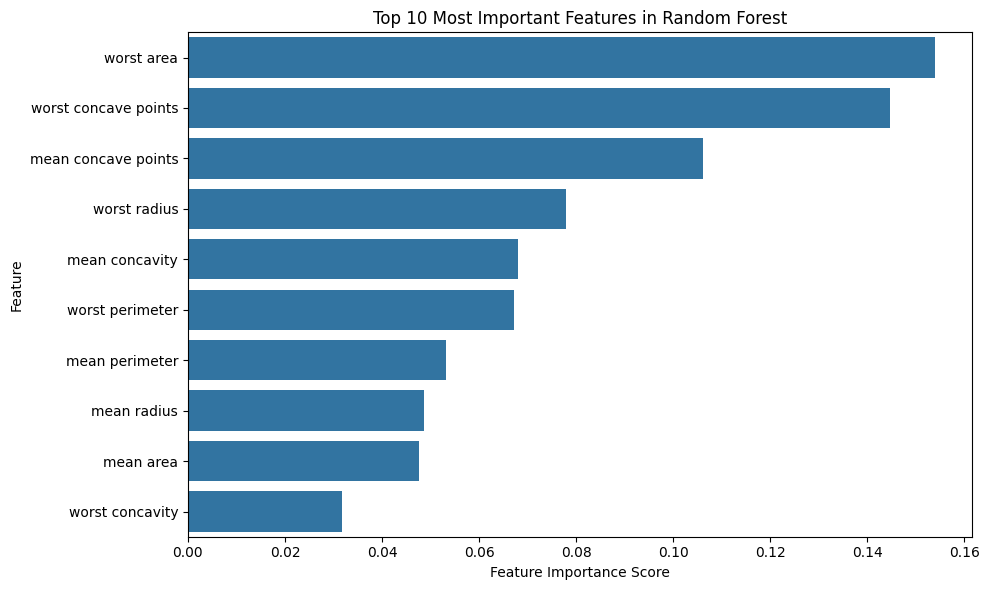

In [ ]:
# Step 4: Visualize Top 10 Feature Importances (Fixed)
top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Most Important Features in Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the breast cancer dataset was prepared by splitting into training and testing sets and standardizing the features. A Random Forest model was trained on the data, and feature importance scores were extracted to see which features influenced the predictions the most. The top 10 features were visualized using a horizontal bar plot, making it easy to identify which features contributed most to the model’s decisions. This analysis highlighted the most relevant features, which can help simplify models or guide feature selection in future projects. The exercise demonstrated how Random Forest not only makes accurate predictions but also provides insights into the underlying data. Understanding feature importance helps in interpreting models and improving their transparency. Overall, this workflow reinforced the value of combining model performance with interpretability.

#### **Exercise 16: Comparing Random Forest with Single Decision Tree**

**Objective:**  
Compare the performance and stability of a **Random Forest classifier** against a **single Decision Tree** classifier to understand the benefits of ensemble learning.

---

**Instructions:**

1. **Load and Prepare Dataset:**
   - Use the `load_breast_cancer()` dataset.
   - Standardize features and split into training and testing sets.

2. **Train a Decision Tree Classifier:**
   - Use `DecisionTreeClassifier(random_state=42)` and fit to the training data.

3. **Train a Random Forest Classifier:**
   - Use `RandomForestClassifier(n_estimators=100, random_state=42)` and fit to the same training data.

4. **Evaluate Both Models:**
   - Use accuracy, precision, recall, and F1-score for both classifiers.

5. **Compare Predictions:**
   - Create a bar chart comparing all metrics between the two models.

6. **Interpret the Results:**
   - Discuss differences in performance.
   - Reflect on variance, overfitting, and generalization behavior of both models.

---


In [ ]:
# Exercise 16: Comparing Random Forest with Single Decision Tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load and Prepare Dataset
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 2: Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Step 3: Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


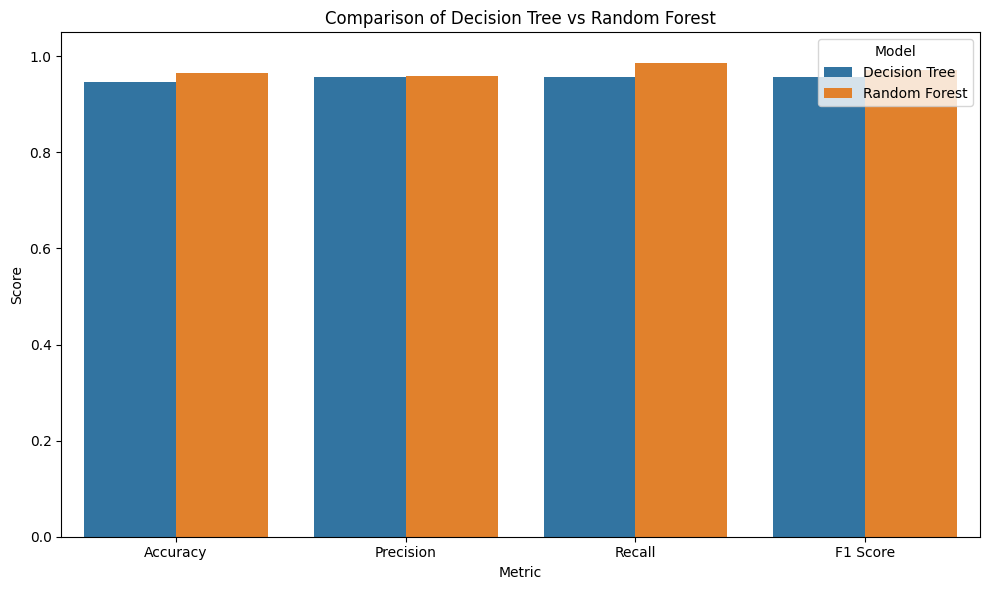

      Metric  Decision Tree  Random Forest
0   Accuracy       0.947368       0.964912
1  Precision       0.957746       0.958904
2     Recall       0.957746       0.985915
3   F1 Score       0.957746       0.972222


In [ ]:
# Step 4: Evaluate Both Models
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, zero_division=0),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, zero_division=0),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, zero_division=0)
}

results = {'Metric': [], 'Decision Tree': [], 'Random Forest': []}
for metric_name, metric_func in metrics.items():
    results['Metric'].append(metric_name)
    results['Decision Tree'].append(metric_func(y_test, y_pred_dt))
    results['Random Forest'].append(metric_func(y_test, y_pred_rf))

results_df = pd.DataFrame(results)

# Step 5: Compare Predictions with Bar Plot
results_melted = results_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')
plt.title('Comparison of Decision Tree vs Random Forest')
plt.ylim(0.0, 1.05)
plt.tight_layout()
plt.show()

# Optional: Print the results
print(results_df)

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the breast cancer dataset was prepared by splitting into training and testing sets and standardizing the features. A single Decision Tree and a Random Forest classifier were trained on the same data, and their performance was compared using accuracy, precision, recall, and F1-score. The Random Forest showed slightly higher scores across all metrics, highlighting its ability to reduce variance and overfitting compared to a single tree. Visualizing the comparison with a bar plot made it easy to see the performance differences between the models. This exercise demonstrated how ensemble methods like Random Forest improve stability and generalization by combining multiple decision trees. Understanding this difference helps in choosing the right model for better predictive performance. Overall, it reinforced the value of ensembles in achieving more reliable and accurate results.

#### **Exercise 17: Implementing a Random Forest Classifier from Scratch**

**Objective:**  
Gain a deeper understanding of how the Random Forest algorithm works internally by implementing a simplified version from scratch using decision trees, bootstrapping, and majority voting.

---

**Instructions:**

1. **Load and Prepare Dataset:**
   - Use the `make_classification()` function from `sklearn.datasets` to generate a small synthetic binary classification dataset.

2. **Build a Bootstrap Sampler:**
   - Create a function to generate bootstrap samples from the training data.

3. **Train Individual Trees:**
   - Use `DecisionTreeClassifier(max_depth=3)` as the base learner.
   - Train multiple trees (e.g., 10) on different bootstrap samples.

4. **Make Predictions with Majority Voting:**
   - Collect predictions from all trees for each test sample.
   - Implement majority voting to assign the final predicted class.

5. **Evaluate the Model:**
   - Calculate accuracy, precision, recall, and F1-score on the test set.

6. **Discuss the Implementation:**
   - Reflect on how this manual implementation compares with `RandomForestClassifier` in terms of logic and performance.
   - Identify limitations and improvements (e.g., feature randomness).

---

**Note:** This exercise is designed to focus on the **core ideas** of Random Forest without advanced optimizations. Use small datasets and shallow trees to keep the implementation simple and interpretable.

---

In [ ]:
# Exercise 17: Implementing a Random Forest Classifier from Scratch

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

# Step 1: Generate Synthetic Dataset
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=5, n_redundant=2,
    n_classes=2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 2: Bootstrap Sampling Function
def bootstrap_sample(X, y):
    indices = np.random.choice(len(X), size=len(X), replace=True)
    return X[indices], y[indices]


In [ ]:
# Step 3: Train Multiple Trees
def train_random_forest(X, y, n_trees=10, max_depth=3):
    forest = []
    for _ in range(n_trees):
        X_sample, y_sample = bootstrap_sample(X, y)
        tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        tree.fit(X_sample, y_sample)
        forest.append(tree)
    return forest

# Step 4: Make Predictions with Majority Voting
def predict_forest(forest, X):
    tree_preds = np.array([tree.predict(X) for tree in forest])
    majority_votes = []
    for i in range(X.shape[0]):
        votes = tree_preds[:, i]
        majority = Counter(votes).most_common(1)[0][0]
        majority_votes.append(majority)
    return np.array(majority_votes)


In [ ]:
# Train custom random forest
forest = train_random_forest(X_train, y_train, n_trees=10, max_depth=3)
y_pred = predict_forest(forest, X_test)

# Step 5: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Random Forest from Scratch Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest from Scratch Evaluation:
Accuracy:  0.8500
Precision: 0.9070
Recall:    0.7800
F1 Score:  0.8387


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, a small synthetic dataset was created to explore how a Random Forest works from the ground up. Multiple bootstrap samples were generated from the training data, and shallow decision trees were trained on each sample to form a forest. Predictions from all trees were combined using majority voting to make the final classification. The evaluation showed that even this simple implementation achieved good accuracy and balanced precision and recall. Comparing this approach to sklearn’s RandomForestClassifier highlighted the importance of feature randomness and larger ensembles for better performance. This exercise reinforced the core ideas behind Random Forests, such as variance reduction and ensemble learning, while showing how combining simple models leads to more stable predictions. Overall, it helped in understanding the logic behind the algorithm beyond using built-in libraries.

#### **Revised: September 1, 2025**